# Powerproduction model

<br>

## Read and overall view of the dataset

****

To start, let's make a general view of the entire dataset. First of all we import it directly using [Pandas](https://pandas.pydata.org).

In [1]:
#import pandas and read powerproduction dataset
import pandas as pd
path = ("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")## 
df = pd.read_csv (path)
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


As it can be seen, we have a dataset of two variables (Power and speed) and 500 entries in the entire dataset.
Now, let's make some plots to have an overall and deeply view on the distribution of each of the variables and how are correlated between them.

A good method to have an overall view of the variables distribution and how they are correlated is by using [seaborn pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html).

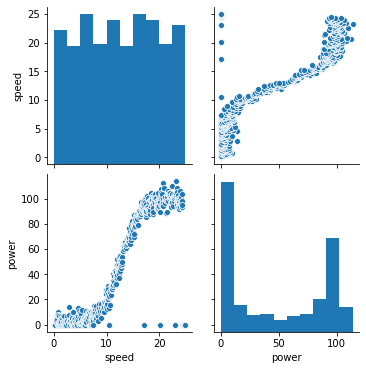

In [2]:
import seaborn as sns
sns.pairplot(df)

By analysing the plot, we can clearly see that meanwhile the speed distribution remains quite constant throghout all values, power is distributed quite heterogeneous, being the extrem values, the ones where it is concentrated mostly of the values

Let's now make a [barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html) to see the distribution of both values associated:

Text(0.5, 1.0, 'Distribution of speed values with the correspondent power')

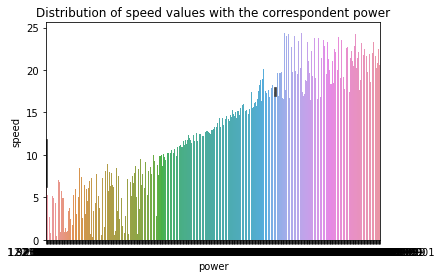

In [3]:
sns.barplot(x="power",y="speed", data=df).set_title('Distribution of speed values with the correspondent power')

By analysing the barplot, we can observed that the distribution in lower and higher power values is quite horizontal, meanwhile when it comes the medium values the progress of the plot shows a constant positive slope.

Let's now deeply analize both variables separate through a [distribution plot](https://seaborn.pydata.org/generated/seaborn.distplot.html)

Text(0.5, 1.0, 'Distribution of power values')

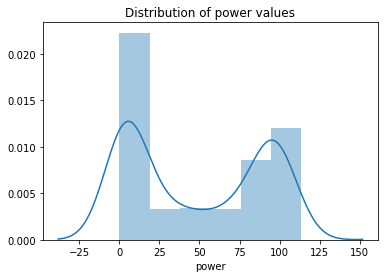

In [4]:
sns.distplot(df['power']).set_title('Distribution of power values')

As seen above, we can identify two peaks in the distribution of power vales, first on at the beginning of the series (around 10) and the second one nearly the end (around 90). The power registered in the dataset goes high so quick, bounces back and comes back up again at the end of the series.

Text(0.5, 1.0, 'Distribution of speed values')

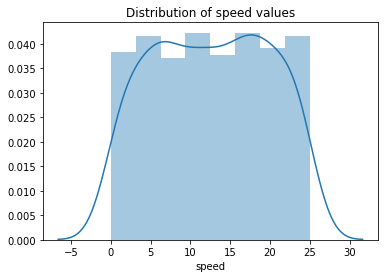

In [5]:
sns.distplot(df['speed']).set_title('Distribution of speed values')

Meanwhile, when it comes to speed distribution, it goes up significately quick and it keeps there throughout all series to go quickly down at the end of the series

<br>

## Simple linear regression

***

Let's now make the simple linear regression using [numpy](https://numpy.org/) and [matplotlib](https://matplotlib.org/). First of all, let's see how it looks the dataset.

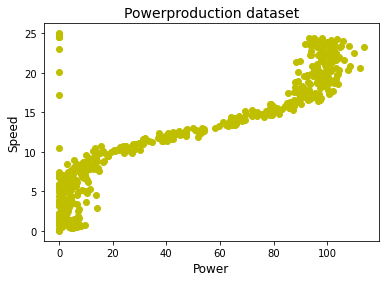

In [6]:
import matplotlib.pyplot as plt
import numpy as np
## Define X and Y variables
x = df['power']
y = df['speed'] 

plt.title('Powerproduction dataset', fontsize=14)
plt.xlabel('Power', fontsize=12)
plt.ylabel('Speed', fontsize=12)
plt.plot(x, y, 'yo')

As a first view, it looks quite linear in the middle of the plot, meanwhile there are other shapes in the extremes (lower and higher power values). To start, let's treat it under the hipothesis that follows a regression line. regression lines follow form *y=mx+c*, where *m* gives reference of the slope of the line and *c* gives the point of intersection between the line and the *Y* axis. First thing we are going to make a subset of the middle of the plot in order to work in a more representative are. There we are going to propose three lines that potentially could fit the dataset (1),(2),(3).

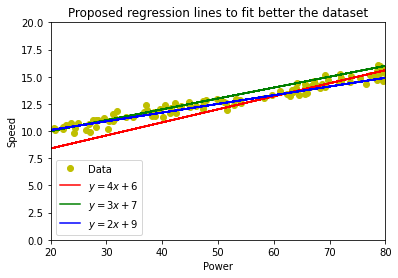

In [18]:
plt.xlim(20, 80)
plt.ylim(0, 20)
plt.plot(x, y, 'yo', label="Data") 
plt.title('Proposed regression lines to fit better the dataset')
plt.plot(x, 0.12 * x + 6.0, 'r-', label=r"$y=4x + 6$")
plt.plot(x, 0.10 * x +  8.0, 'g-', label=r"$y=3x +  7$")
plt.plot(x, 0.08 * x + 8.5, 'b-', label=r"$y=2x + 9$")
plt.xlabel('Power')
plt.ylabel('Speed')
plt.legend()

As it can be seen in this subset the blue line ($y=2x+9$) seems to better fit the trend over there. Now let's take a general view of the entire dataset.

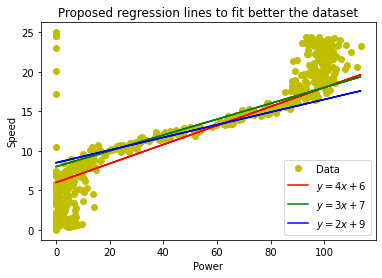

In [19]:
plt.plot(x, y, 'yo', label="Data") 
plt.title('Proposed regression lines to fit better the dataset')
plt.plot(x, 0.12 * x + 6.0, 'r-', label=r"$y=4x + 6$")
plt.plot(x, 0.10 * x +  8.0, 'g-', label=r"$y=3x +  7$")
plt.plot(x, 0.08 * x + 8.5, 'b-', label=r"$y=2x + 9$")
plt.xlabel('Power')
plt.ylabel('Speed')
plt.legend()

When it comes to draw all three lines overlapping the entire datase, none of them look to be best fit. Let's now make the simple linear regression using [numpy](https://numpy.org/) and [matplotlib](https://matplotlib.org/). To set up the regression line, first we select $X$ and $Y$ values from the dataset. After that, since we know the linear regression has a form $y=mx+c$, we find the $m$ and $c$ components using [numpy's polyfit function](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html). Once $m$ and $c$ is known, then regression line is plot over all dataset points (1),(2),(3).

component m:  0.1482301668241005
component c:  5.473188203690215


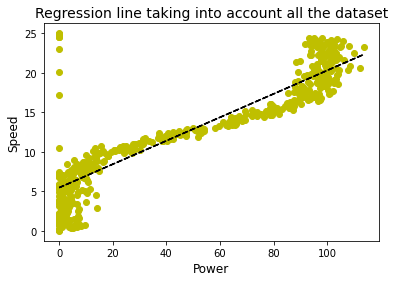

In [20]:
import matplotlib.pyplot as plt
import numpy as np
## Define X and Y variables
x = df['power']
y = df['speed'] 

m,c = np.polyfit(x, y, 1)
print('component m: ',m)
print('component c: ',c)
plt.title('Regression line taking into account all the dataset', fontsize=14)
plt.xlabel('Power', fontsize=12)
plt.ylabel('Speed', fontsize=12)
plt.plot(x, y, 'yo', x, m*x+c, '--k') 

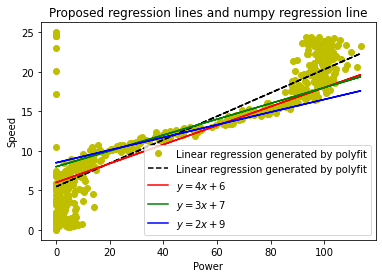

In [21]:
plt.title('Proposed regression lines and numpy regression line')

plt.plot(x, y, 'yo', x, m*x+c, '--k',label=r"Linear regression generated by polyfit")
plt.plot(x, 0.12 * x + 6.0, 'r-', label=r"$y=4x + 6$")
plt.plot(x, 0.10 * x +  8.0, 'g-', label=r"$y=3x +  7$")
plt.plot(x, 0.08 * x + 8.5, 'b-', label=r"$y=2x + 9$")
plt.xlabel('Power')
plt.ylabel('Speed')
plt.legend()

As we can see, the regression line generated by using Numpy's polyfit has more slope than the ones proposed. Now let's make some accuracy test to see which line fits the best between all of them.

<br>

## Accuracy

***


After exploring the dataset, proposing some regression lines and running simple linear regression, linear regression showed a substancial different shape than the ones proposed. Now, in order to confirm that, let's calculate which one better fits, if one of the proposed or the regression line. (4)

First thing we are going to do is to calculate the **cost**. The **cost** is the one calculated by least squares fitting. It considers the *best line* is the one with a lower result on the following equation:
                                    *$(y_{i}-mx_{i}-c)^2$*.

In [22]:
# Calculate the cost of all lines
cost = lambda m,c: np.sum([(y[i] - m * x[i] - c)**2 for i in range(x.size)])
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (m, c, cost(m, c))) ## Cost for linear regression entire dataset
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (4.0, 6.0, cost(4.0, 6.0)))## cost for proposed line red
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (3.0,  7.0, cost(3.0,  7.0)))## cost for proposed line green
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (2.0, 9.0, cost(2.0, 9.0)))## cost for proposed line blue

Cost with m =  0.15 and c =  5.47:  7060.69
Cost with m =  4.00 and c =  6.00: 30026948.54
Cost with m =  3.00 and c =  7.00: 16619541.90
Cost with m =  2.00 and c =  9.00: 7242754.23


By analysing the results, those confirm that the regression line calculated using Polyfit, has less error than the ones proposed after **cost** calculation.

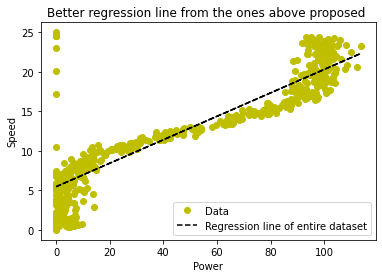

In [23]:

plt.plot(x, y, 'yo', label="Data") 
plt.title('Better regression line from the ones above proposed ')
plt.plot(x, m*x+c, '--k',label="Regression line of entire dataset") 
plt.xlabel('Power')
plt.ylabel('Speed')
plt.legend()

Even like that, we see some spaces where the line goes thru and it doesn't appear to catch even a single point. On the other hand, the line is passing in between a point cloud, where it appears to be a big gap between the point dataset and the regression line. That means linear regression doen't look as the best fit line of the dataset.

<br>

## Best fit line

***

As seen above, the regression line doesn't look to fit completely the model. The reason is dataset distribution it is not distributed as a stright line, but as a **polynomial**. **Polynomial** line trending describes a pattern in data that is curved or breaks from a straight linear trend. It often occurs in a large set of data that contains many fluctuations. As more data becomes available, the trends often become less linear, and a polynomial trend takes its place. **Polynomial** lines follow the form $y=a_{n}(x^{n})$, where $a$ is the constant, $x$ is the variable and $n$ is the exponent (8).

To demonstrate that is to look for **polynomial** fit instead of linear fit just by adding more dimensions in polyfit.(5),(6) Below it has been chosen a **polynomial** line grade 4 to challenge **regression line** above obtained.

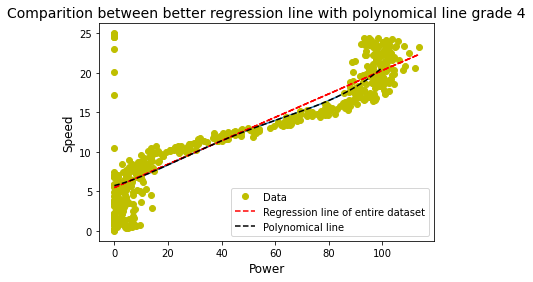

In [24]:
## Define X and Y variables
x = df['power']
y = df['speed'] 

model = np.poly1d(np.polyfit(x, y, 4))

line = np.linspace(0,100,500) 

plt.title('Comparition between better regression line with polynomical line grade 4', fontsize=14)
plt.xlabel('Power', fontsize=12)
plt.ylabel('Speed', fontsize=12)
plt.plot(line, model(line))
plt.plot(x, y, 'yo',label="Data") 
plt.plot(x, m*x+c, '--r',label="Regression line of entire dataset") 
plt.plot(line, model(line),'--k',label=r"Polynomical line")
plt.legend()

As we can see, seems the polynomical line proposed, seems to better fit the dataset distribution. In order to confirm that, it has been calculated **Mean Square Error** for both lines. the formula of **MSE** is the following: $$[\sum_{i = 1}^{n} (x_{f_{i}}-x_{o_{i}})/N]^{1/2}$$ where $x_{f_{i}}$ is forecast value and $x_{o_{i}}$ is the observed value (9). As lower this result is, more accurate the line will be, therefore better fit. To do that it has been used [scikit-learn](https://scikit-learn.org/stable/) library with the moddule [mean squared error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html).

In [25]:
from sklearn.metrics import mean_squared_error
## Polynomial line case
# Given values 
Y_true = y  # Y_true = Y (original values) 
Y_true = Y_true.to_numpy() ## from pandas dataframe to numpy array

# calculated values 
Y_pred = model(line)  # Y_pred = Y' 
Y_pred = Y_pred

# Calculation of Mean Squared Error (MSE) 
a=mean_squared_error(Y_true,Y_pred) 
print('MSE for polynomial line',a)
Y_predict = m*x+c ## Regression line
b=mean_squared_error(Y_true,Y_predict)
print('MSE for regression line',b)
## https://www.geeksforgeeks.org/python-mean-squared-error/

MSE for polynomial line 9.944052497885435
MSE for regression line 14.121375241876422


As we can see, **MSE** for **polynomial** line grade 4, has lower error than **regression line** error. That means **Polynomial** line better fits the model.

### END

<br>

## References

***

(1) Stackoverflow: https://stackoverflow.com/questions/12444716/how-do-i-set-the-figure-title-and-axes-labels-font-size-in-matplotlib

(2) Stackoverflow: https://stackoverflow.com/questions/6148207/linear-regression-with-matplotlib-numpy

(3) Ian Mclaughlin's Github: https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/simple-linear-regression.ipynb

(4) Ian Mclaughlin's Github: https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/simple-linear-regression.ipynb

(5) W3schools: https://www.w3schools.com/python/python_ml_polynomial_regression.asp

(6) Statisticshowto: https://www.statisticshowto.com/line-of-best-fit/

(7) geeksforgeeks : https://www.geeksforgeeks.org/python-mean-squared-error/

(8) investopedia : https://www.investopedia.com/terms/p/polynomial_trending.asp

(9) statisticshowto : https://www.statisticshowto.com/probability-and-statistics/regression-analysis/rmse-root-mean-square-error/
